# Hohman Transfers

In this tutorial created by [satsearch](https://satsearch.co/) you will learn how to do basics calculations regarding Hohmann transfers. We will also see how to use the [PySatsearch library](https://test.pypi.org/project/PySatsearch/) to quickly and easily obtain information about thrusters so we compare them.

A [Hohmann transfer](https://en.wikipedia.org/wiki/Hohmann_transfer) is a technique for firing rockets (when small called thrusters) used to change the orbit of a spacecraft. It was named after the German Phycisist Walter Hohmann who calculated it to be the most energy efficient method to change the altitude of an orbiting spacecraft.

In orbital mechanics, the concepts of speeding up and slowing down are counterintuitive. If you fire a engine while in orbit, you will go to a higher orbit, and therefore slow down. If you were to fire an engine in the reverse direction of flight, you will go into a lower orbit, and therefore speed up. In a Hohmann transfer, the spacecraft will fire its engines (or thrusters), to increase the velocity of the spacecraft, but the final velocity of the spacecraft will be lower than the initial. [Here you can find out more about orbital mechanics](https://en.wikipedia.org/wiki/Orbital_mechanics).

Orbital velocity and altitude are closely related. It is the force of gravity that provides the centripetal force preventing a spacecraft from going straight and allows it to orbit a body. For a spacecraft to be a in stable circular orbit, the orbital velocity and distance from the body must such that the gravitational force is equal to the centripital force required to orbit at that radius (for simple calculations we can take earth to be a point mass).

$$
F_{cp} = F_{gravitational}\\
$$

$$
m_{spacecraft} \frac{v_{orbit}^2}{r} = G \frac{M_{earth}m_{spacecraft}}{r^2}\\
$$

$$
v_{orbit}^2 = \frac{G M_{earth}}{r}
$$

$$
v_{orbit} = \sqrt{\frac{G M_{earth}}{r}}
$$
Note here that the r is the distance between the spacecraft and the center of the earth, so: $r = R + h$ (where R is the radius of the planet and h is the altitude of the spacecraft).

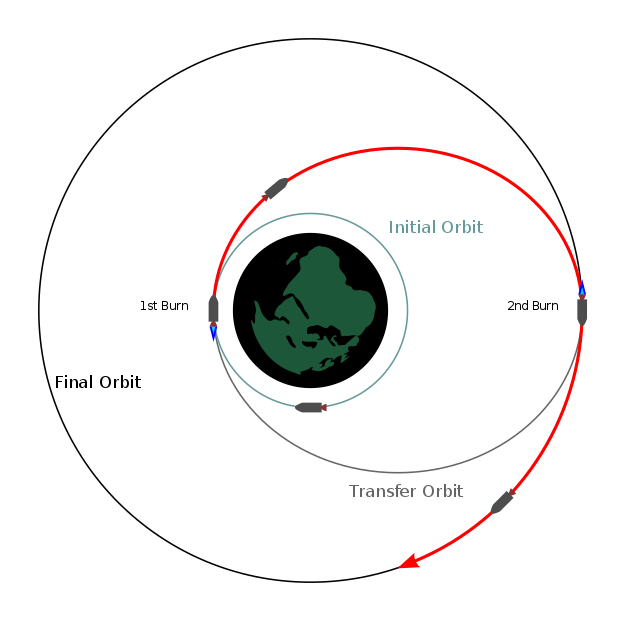

In [1]:
from IPython.display import Image
Image("orbitchange.png")

To achieve a change in orbit, a thrust force is needed, this is usually provided by epxelling mass out of a rocket engine. We can see from the above image that the procedure for a Hohmann transfer is as follows:
* A burn is needed to change from the initial orbit to a (Hohmann) transfer orbit, which will be elliptical.
* A second burn is required to go from the transfer to the final orbit

The magnitude of the change in velocity needed to achieve this orbit change can be found by calculating the velocity required to be in each orbit (which, for the elliptical orbit, changes during the orbit). The formulae for the velocity of an orbiting spacecraft (or any type of object for that matter) are given by:

$$
Circular \;orbit\quad:\qquad v_{orbit}= \sqrt{\frac{M_{e}G}{R_e + h}}
$$

$$
Elliptial\;orbit\quad:\qquad v_{orbit}= \sqrt{2*GM_e \left( \frac{1}{R_e+h} - \frac{1}{2a} \right)}
$$

Where $M_e$ is the mass of the earth, $R_e$ is the radius of the earth, h is the altitude of the spacecraft, G is the universal gravitational constant and a is the semi-major axis. The semi-major axis is defined as:

$$
a = \frac{r_a+r_p}{2}
$$
[Here you can find out more about orbital speed.](https://en.wikipedia.org/wiki/Orbital_speed)

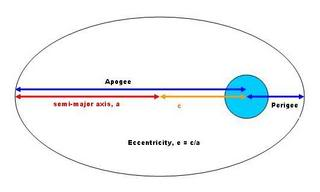

In [2]:
Image("elliptical.jpeg")

Where $r_a$ is the radius at apoaps (farthest away from the body it is orbiting, in case it is earth it is called apogee) and $r_p$ is the radius at perigee.

So, with the two above formulae, we can calculate the velocity the spacecraft should have in each of the stadia, and the difference in velocity is then the velocity change that the thruster(s) need(s) to provide.

Once we know the total velocity change required, also know al $\Delta v$ ("[delta v](https://en.wikipedia.org/wiki/Delta-v_budget)"
), we can find the propellant mass required with the [rocket equation](https://en.wikipedia.org/wiki/Tsiolkovsky_rocket_equation):
$$
\Delta v = I_{sp} g \; ln \left( \frac{M_{start}}{M_{end}} \right) 
$$

Where g is the gravitational constant, $M_{start}$  is the mass before the engines are lit and $M_{end}$ is the mass after the fuel tanks are depleted. But what is this $I_sp$? Well, that is the specific impulse, a measure of the efficiency of an engine.

As the $I_sp$ is dependent on the thruster, it is usefull to do the calculations for multiple thrusters at the same time, luckily, the PySatsearch library allows us to do just that.

# Getting the specific impulses

In [3]:
from PySatsearch import Satsearch
import os
from dotenv import load_dotenv
import copy
load_dotenv('.env')

satsearch = Satsearch(os.getenv("APP_ID"), os.getenv("API_TOKEN"))


satsearch.print_categories()

	 -- 	uuid: cb070e28-4d2b-52e2-b8f2-51a49e5abd7e
	name: AIT
	parent_uuid	children
		 -- 		uuid: 67b824c4-2fef-505e-9d5b-53df6d97b270
		name: Service
		parent_uuid: cb070e28-4d2b-52e2-b8f2-51a49e5abd7e
		children
		 -- 		uuid: abcd425f-da13-560f-8e1a-96b030b60e8c
		name: Software
		parent_uuid: cb070e28-4d2b-52e2-b8f2-51a49e5abd7e
		children
		 -- 		uuid: e5d79ed0-4ccd-5163-96c5-112e49b1df11
		name: System
		parent_uuid: cb070e28-4d2b-52e2-b8f2-51a49e5abd7e
		children
		 -- 		uuid: 195ffafa-e690-5980-863c-0c36146be91e
		name: MGSE
		parent_uuid: cb070e28-4d2b-52e2-b8f2-51a49e5abd7e
		children
		 -- 		uuid: 23d9bc79-e448-5dc0-83e9-062d8a4a36f9
		name: EGSE
		parent_uuid: cb070e28-4d2b-52e2-b8f2-51a49e5abd7e
		children
	 -- 	uuid: 6a64005e-5e52-512e-9f8f-51eb2b9911ea
	name: Antenna
	parent_uuid	children
		 -- 		uuid: a44fd591-b3ed-5b65-8771-b838694263ce
		name: Dipole
		parent_uuid: 6a64005e-5e52-512e-9f8f-51eb2b9911ea
		children
		 -- 		uuid: 01df3b67-2919-5ea2-a2d6-1a3a06275109
		name: 

From this we can find that the category uuid of thrusters is 'a7bb0edc-4b93-516c-a0fd-878d69f1f580' (Note that it is above the name)

In [4]:
products = satsearch.get_all_products("a7bb0edc-4b93-516c-a0fd-878d69f1f580", simplify=True)

# Not all of the products have information, some of them only hold a name, and we don't care about those now.
print("BEFORE:", products)
products = [product for product in products if len(product)>1]
print("AFTER:", products)

BEFORE: [{'name': 'TILE 500'}, {'name': 'TILE 5000'}, {'mass': {'value': '0.20', 'unit': 'kg'}, 'propellant type': {'value': 'hydrazine', 'unit': '/'}, 'catalyst': {'value': 'S-405', 'unit': '/'}, 'thrust': {'value': 0.62, 'unit': 'N'}, 'feed pressure': {'value': 16.900000000000002, 'unit': 'bar'}, 'chamber pressure': {'value': 14.649999999999999, 'unit': 'bar'}, 'expansion ratio': {'value': '100', 'unit': '/'}, 'total thrust pulses': {'value': '275028', 'unit': '/'}, 'specific impulse': {'value': 216.5, 'unit': 's'}, 'total impulse': {'value': '186000', 'unit': 'N s'}, 'mass flow rate': {'value': 0.295, 'unit': 'g s^-1'}, 'name': 'MR-103D 1N (0.2-lbf) Rocket Engine Assembly'}, {'mass': {'value': '0.204', 'unit': 'kg'}, 'propellant type': {'value': 'hydrazine', 'unit': '/'}, 'catalyst': {'value': 'S-405', 'unit': '/'}, 'thrust': {'value': 0.6599999999999999, 'unit': 'N'}, 'feed pressure': {'value': 16.55, 'unit': 'bar'}, 'chamber pressure': {'value': 14.15, 'unit': 'bar'}, 'expansion r

In [5]:
len(products)

4

Let's have a look at the data we have, for example this first in the list

In [6]:
products[0]

{'mass': {'value': '0.20', 'unit': 'kg'},
 'propellant type': {'value': 'hydrazine', 'unit': '/'},
 'catalyst': {'value': 'S-405', 'unit': '/'},
 'thrust': {'value': 0.62, 'unit': 'N'},
 'feed pressure': {'value': 16.900000000000002, 'unit': 'bar'},
 'chamber pressure': {'value': 14.649999999999999, 'unit': 'bar'},
 'expansion ratio': {'value': '100', 'unit': '/'},
 'total thrust pulses': {'value': '275028', 'unit': '/'},
 'specific impulse': {'value': 216.5, 'unit': 's'},
 'total impulse': {'value': '186000', 'unit': 'N s'},
 'mass flow rate': {'value': 0.295, 'unit': 'g s^-1'},
 'name': 'MR-103D 1N (0.2-lbf) Rocket Engine Assembly'}

# Finding correct delta v

As the previous calculations were done for a transfer from Low Earth Orbit to Geostationnary orbit, they are irrelevant to our case. We want to calculate the change in velocity required (delta v) to be outputted from the thruster of the engine for a small satelite to get from the international space station to a target altitude of 430 km, so let's write a function to find this for us:

In [7]:
import math


def delta_v(h_start, h_end):
    v_orbit_start = math.sqrt(5.972*10**24*6.674*10**-11 / (h_start+6378*10**3))
    a_transfer = ((h_start + 6378*10**3) + (h_end + 6378*10**3))/2
    v_orbit_transfer_start = math.sqrt(2*5.972*10**24*6.674*10**-11*
                                       (1/(6378*10**3 + h_start)-1/(2 * a_transfer)))
    # Therefore we know the first delta_v:
    delta_v_1 = abs(v_orbit_transfer_start - v_orbit_start)
    
    v_orbit_end = math.sqrt(5.972*10**24*6.674*10**-11 / (h_end+6378*10**3))
    v_orbit_transfer_end = math.sqrt(2*5.972*10**24*6.674*10**-11*
                                       (1/(6378*10**3 + h_end)-1/(2 * a_transfer)))
    # Now the second delta v:
    delta_v_2 = abs(v_orbit_transfer_end - v_orbit_end)
    delta_v = delta_v_1 + delta_v_2
    return delta_v    

# Calculating the propellant mass

$$
\Delta V = I_{sp}*g*ln(\frac{M_{start}}{M_{end}})
$$
We can rearrange this formula to find that:
$$
M_{end} = M_{start}*e^{\frac{-\Delta V}{g*I_{sp}}}
$$

We know that the only change in mass that occurs during the firing of the engines is the reduction in propellant, thus:
$$
M_{propellant} = M_{start} - M_{end} = M_{start} \left( 1- e^{\frac{-\Delta V}{g*I_{sp}}}  \right)
$$
So let's calculate that:

In [9]:
import math
d_v = delta_v(185*10**3, 35768*10**3)
m_sat = 40  # Without propulsion system
results = []

for i in products:
    try:
        if i["specific impulse"] != None:# if this were false, it means there is not i_sp data for this thruster
            i_sp = i["specific impulse"]
            m_propellant = (m_sat+i["mass"])*(1 - math.exp(-d_v / (9.81*i_sp) ))
            m_total = m_propellant + i["mass"]
            i["system mass"] = m_total
    except:
        pass

In [14]:
products

[{'mass': {'value': '0.20', 'unit': 'kg'},
  'propellant type': {'value': 'hydrazine', 'unit': '/'},
  'catalyst': {'value': 'S-405', 'unit': '/'},
  'thrust': {'value': 0.62, 'unit': 'N'},
  'feed pressure': {'value': 16.900000000000002, 'unit': 'bar'},
  'chamber pressure': {'value': 14.649999999999999, 'unit': 'bar'},
  'expansion ratio': {'value': '100', 'unit': '/'},
  'total thrust pulses': {'value': '275028', 'unit': '/'},
  'specific impulse': {'value': 216.5, 'unit': 's'},
  'total impulse': {'value': '186000', 'unit': 'N s'},
  'mass flow rate': {'value': 0.295, 'unit': 'g s^-1'},
  'name': 'MR-103D 1N (0.2-lbf) Rocket Engine Assembly'},
 {'mass': {'value': '0.204', 'unit': 'kg'},
  'propellant type': {'value': 'hydrazine', 'unit': '/'},
  'catalyst': {'value': 'S-405', 'unit': '/'},
  'thrust': {'value': 0.6599999999999999, 'unit': 'N'},
  'feed pressure': {'value': 16.55, 'unit': 'bar'},
  'chamber pressure': {'value': 14.15, 'unit': 'bar'},
  'expansion ratio': {'value': '

# NOTE TO WHOMEVER MIGHT PUBLISH
After this point, I try to explore the data, but there are only 4 thrusters available, so you'll probably want to add more parts and then redo the data exploration, because it's pretty boring now (so I didn't bother verifying that it all works, it probably doesn't). I'm just leaving the rest there because it might be interesting to have a look at what I thought about doing.

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt



def cap(s, l):
    return s if len(s)<=l else s[0:l-3]+'...'

x = []
y = []
names = []

# Let's take a the first one as a reference point
base = products[0]["system mass"]

for i in products:
    x.append(i["name"])
    names.append(cap(i["name"], 10))
    y.append(i["system mass"]- base)
    
plt.bar(x[1:], y[1:], align='center', alpha=0.5)
plt.xticks(x[1:], names[1:])
plt.legend
plt.ylabel('mass [kg]')
plt.title('Propulsion system mass relative to MR-103D')

plt.show()

KeyError: 'system mass'

So it seems that if you want to design a spacecraft propulsion system to do a Hohmann transfer from LEO to GEO, more analysis is needed. We haven't yet taken into account the thruster's thrust, which will determine the time it would take to do the transfer.

$$
a = \frac{dv}{dt} \\
Assuming \; constant \; acceleration: \\
v = \int a dt = a t\\
burn \; time = \frac{delta \; v}{accleration} = \frac{delta \; v}{Force / mass}
$$

In [ ]:
for i in parts:
    i["burn time"] = d_v / (i["thrust"]/i["system mass"])

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

for i in parts:
    x.append(i["mass"])
    y.append(i["specific impulse"])

plt.scatter(x, y)
plt.legend
plt.ylabel('specific impulse [s]')
plt.xlabel('system mass [kg]')
plt.title('mass vs specific impulse')

plt.show()

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt 


x = []
y = []

for i in parts:
    try:
        if i["thrust"] < 100:
            y.append(i["thrust"])
            x.append(vol/ i["mass"])
    except:
        pass

plt.scatter(x, y)
plt.legend
plt.ylabel('Thrust [N]')
plt.xlabel('Thruster density [kg/m^3]')
plt.title('Density vs Thrust')

plt.show()

We could continue making graphs like this, one by one, but let's make it into a function

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def cap(s, l):
    return s if len(s)<=l else s[0:l-3]+'...'

def make_graph(attribute, label, title):
    x = []
    y = []
    names = []

    for i in parts:
        try:  # We have to use try and except because not all parts have the attribute power.
            y.append(i[attribute])
            x.append(i["name"])
            names.append(cap(i["name"], 10))
        except:
            pass
    plt.figure()
    plt.bar(x, y, align='center', alpha=0.5)
    plt.xticks(x, names)
    plt.legend
    plt.yscale("log")
    plt.ylabel(label)
    plt.title(title)

    plt.show()

make_graph("power", "power [W]", "Power")

Some more interesting reads:
* [What Is the Hohmann Transfer? Calculating the Hohmann Transfer for Orbits](https://www.masterclass.com/articles/what-is-the-hohmann-transfer-calculating-the-hohmann-transfer-for-orbits#what-is-the-hohmann-transfer)
* [Orbital maneouves](https://en.wikipedia.org/wiki/Orbital_maneuver)
* [Paper on another type of transfer: bi-elliptic](https://www.sciencedirect.com/topics/engineering/hohmann-transfer)
* [Bi-elliptic transfer](https://en.wikipedia.org/wiki/Bi-elliptic_transfer)
* [satsearch](https://satsearch.co)